In [62]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

We'll walk through a famous machine learning dataset: iris dataset. 

Iris dataset was originally published on the UCI (UC Irvine) Machien Learning Repository. Due to its popularity in the machine learning repository, it has now been adopted to almost a number of machine learning packages. You can download its original data format from https://archive.ics.uci.edu/ml/datasets/iris, or you can use python package sklearn to load it into the envirnoment. Alternatively, I prepared another csv file version of the Iris dataset to start with. 

The Iris datset contains 3 different species of the Iris flower: Setosa, Verisolour and Virginica. Each species has 50 samples, or in other words, 50 rows in the dataset. Therefore, it forms a total of 150 data records. Each sample has 4 attributes: sepal length, sepal width, petal length and petal width. All attributes are in the unit of cm. 

In [63]:
iris_df = pd.read_csv('./iris_dataset.csv')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Linear regression
Let's start from one example application of the Iris dataset. We'll use sepal length to predict width. We'll visualize them firs to have a better understanding of the dataitself. 

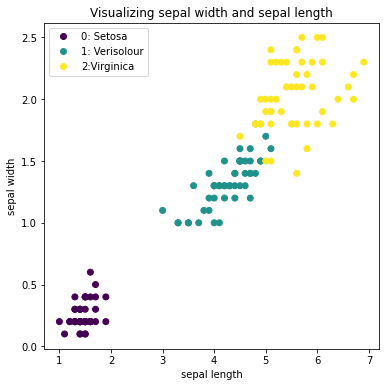

In [5]:
# plotting function
def abline(slope, intercept, **kargws):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, **kargws)   

plt.figure(figsize = (6,6))
scatter = plt.scatter(x = iris_df.petal_length, y = iris_df.petal_width, c = iris_df.label)
plt.legend(handles=scatter.legend_elements()[0], labels=['0: Setosa', '1: Verisolour', '2:Virginica'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Visualizing sepal width and sepal length')
plt.show()

### sklearn package to implement linear regression
one line magic of the linear regression implementation from the sklearn package. 

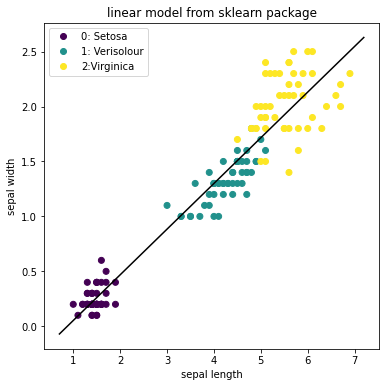

In [6]:
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
Y = iris_df['label'].values
lr = LinearRegression().fit(X[:,2:3], X[:,3])  # one line magic.

# check our model. 
plt.figure(figsize = (6,6))
scatter = plt.scatter(x = iris_df.petal_length, y = iris_df.petal_width, c = iris_df.label)
abline(slope = lr.coef_[0], intercept = lr.intercept_, linestyle = 'solid', color = 'black')
plt.legend(handles=scatter.legend_elements()[0], labels=['0: Setosa', '1: Verisolour', '2:Virginica'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('linear model from sklearn package')
plt.show()

### optimization (gradient descent) to implement linear regression

Linear regression is a simple model to start with. That simplicity allows it to derive a closed form analytical solution, which is not expected to see in real world applications. When modeling tasks become difficulty, model architecture becomes more complex. A methodology to iteratively search the best model paramters becomes a general solution. This procedure is the optimization and functionalies during the modeling training step.

Rather than the one line code magic of this linear system, we can implement an optimization scheme to find the optimal model parameters (training). We use a simple gradient descent method for accomplishing this optimization. 

In [7]:
def train_lr_model(x: np.ndarray, y: np.ndarray):
    """
    Construct the linear model, weights and bias. 
    Loss function. 
    Gradient calculation. 
    """    
    complete_x = np.append(x, np.ones([x.shape[0], 1]), 1)
    
    def linear_model(w: np.array):
        return np.matmul(complete_x, w)
    
    # loss function is the root mean square error. 
    def loss(y_pred: np.ndarray):
        return np.mean((y_pred - y)**2)
    
    # gradient calculation. 
    def gradient(w):
        return 1/2 * np.matmul(complete_x.T, np.matmul(complete_x, w) - y)
    
    # initialize the model parameters. 
    w = np.random.normal(0, 1, size = (x.shape[1] + 1))
    ith_run = 0
    loss_hist = []
    
    temp_ls = loss(linear_model(w))
    
    # Our training will stop when the epoch reachs its maximum iteration or the loss is less than 
    # a predetermined threshold value. 
    while (ith_run <= global_df['epoch'] and temp_ls >= global_df['termi_threshold']):
        temp_pred = linear_model(w)
        temp_gradient = gradient(w) # Shape: (5, )
        
        w -= global_df['learning_rate'] * temp_gradient        
        ith_run += 1
        temp_ls = loss(linear_model(w))
        loss_hist.append(temp_ls)      
    
    return loss_hist, w, temp_pred

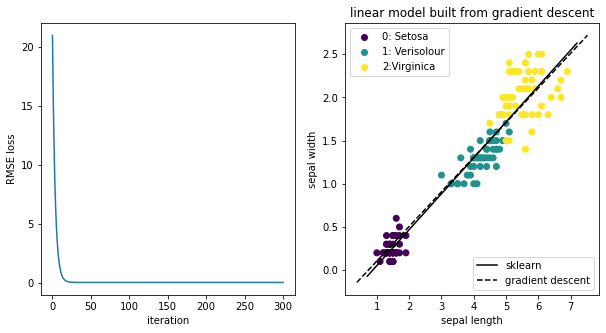

In [14]:
global_df = {'learning_rate': .0001, 
            'epoch': 300, 
            'termi_threshold': .000001}
ls_hist, w_lr, _= train_lr_model(X[:,2].reshape(X[:,2].shape[0], -1), X[:,3])
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(ls_hist)
plt.ylabel('RMSE loss')
plt.xlabel('iteration')

plt.subplot(1, 2, 2)
scatter = plt.scatter(x = iris_df.petal_length, y = iris_df.petal_width, c = iris_df.label)
leg1 = plt.legend(handles=scatter.legend_elements()[0], 
           labels=['0: Setosa', '1: Verisolour', '2:Virginica'], 
          loc='upper left')
abline(slope = lr.coef_[0], intercept = lr.intercept_, linestyle = 'solid', color = 'black', label = 'sklearn')
abline(slope = w_lr[0], intercept=w_lr[1], linestyle = 'dashed', color = 'black', label = 'gradient descent')
plt.legend(loc = 'lower right')
plt.gca().add_artist(leg1)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('linear model built from gradient descent')
plt.show()

### Classification
Next, let's play around the Iris dataset to learn how to handle a classificaiton problem. The problem is defined as: given flower attributes (in our case, we'll use sepal length and sepal width), how do we know which species is it? To start with, let's simplify the problem with a binary classification problem. In other words, instead of using all 150 data records, which contain 3 classes, to train the model, we'll use only 100 records that correspond to merely 2 classes for simplication.

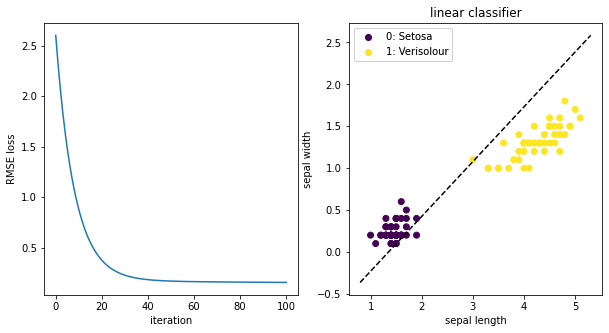

In [59]:
global_df = {'learning_rate': .0001, 
            'epoch': 100, 
            'termi_threshold': .000001}
# only 2 features, last 2 columns in X. 
# we only need to replace input features and predicted variables. 
# X[0:100, 2:4] to predict Y[0:100]
ls_hist_clsf, w_clsf, pred_clsf = train_lr_model(X[0:100,2:4], Y[0:100])  
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(ls_hist_clsf)
plt.ylabel('RMSE loss')
plt.xlabel('iteration')

plt.subplot(1, 2, 2)
sample_iris_df = iris_df.iloc[0:100]
scatter = plt.scatter(x = sample_iris_df.petal_length, 
                      y = sample_iris_df.petal_width, c = sample_iris_df.label)   #, 
leg1 = plt.legend(handles=scatter.legend_elements()[0], 
           labels=['0: Setosa', '1: Verisolour', '2:Virginica'], 
          loc='upper left')
# abline(slope = -w_clsf[2]/w_clsf[3], intercept=(-0.5-w_clsf[4])/w_clsf[3], linestyle = 'dashed', color = 'black', label = 'gradient descent')
abline(slope = -w_clsf[0]/w_clsf[1], intercept=(-w_clsf[2])/w_clsf[1], linestyle = 'dashed', color = 'black')
plt.gca().add_artist(leg1)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('linear classifier')
plt.show()

 after training the model, let's evaluate the model performance. We're intereseted to know the model accuracy, in other words, how much percentage of the data have we accurately predicted?

In [60]:
# post processing the prediction
pred_clsf[pred_clsf < 0] = 0
pred_clsf[pred_clsf > 0] = 1

# print out the model accuracy
np.sum([pred_clsf[i] == Y[i] for i in range(len(pred_clsf))]) / 100

0.97